## Initializations, module imports, and compatibility headers

In [1]:
# main python2 compatibility import
from __future__ import print_function, division

# sage compatibility
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.7)

## Integrators

The integrators are provided in the separate modules referred below.
The source code can be found in the `integrators` folder

In [2]:
# RungeKutta4 for the damped harmonic oscillator
# with dumping paramter a
from integrators.common import rk4

# Symplectic integrators for the damped harmonic
# oscillator with dumping parameter a
from integrators.oscillator import euler, leapfrog, \
    ruth3 #, leapfrog2, pseudoleapfrog

# Contact integrators as described in the paper
# for the damped harmonic oscillator with dumping parameter a
from integrators.oscillator import contact, symcontact, midpoint

## Comparative plots generator

In [3]:
def cmp_plot(init, tspan, a, h, delta, save=False):
    
    # The reference solution is computed using the leapfrog
    # algorithm with much finer error step
    r = leapfrog(init, tspan, a, h/delta)

    s1 = contact(init, tspan, a, h)
    s2 = symcontact(init, tspan, a, h)
    #s2 = midpoint(init, tspan, a, h)
    s3 = euler(init, tspan, a, h)
    s4 = leapfrog(init, tspan, a, h)
    #s5 = leapfrog2(init, tspan, a, h)
    s6 = ruth3(init, tspan, a, h)
    s7 = rk4(init,tspan,a,h)

    # As the solutions that we are going to discuss have a very small
    # magnitude, the relative error is computed as the absolute value
    # of the integrated solution divided by the reference solution 
    # slightly shifted from 0 and renormalized. We chose this function
    # to emphasize the relative size of the error compared to the solution.
    relerr = lambda ref, sol: np.abs((1.0+sol)/(1.0+ref)-1.0)
    
    timerange = np.arange(tspan[0], tspan[1], h)
    ref = r[::delta,1]
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(211)
    plt.title("Solution for $h={}$, $\\alpha={}$, $(p_0,q_0)={}$".
              format(h, a, tuple(init))
             )
    plt.plot(timerange, s1[:,1], label="Contact (1st)", linestyle="--")
    plt.plot(timerange, s2[:,1], label="Contact (2nd)", linestyle="-.")
    #plt.plot(timerange, s3[:,1], label="Symplectic Euler", linestyle=":")
    plt.plot(timerange, s4[:,1], label="Leapfrog", linestyle=":")
    #plt.plot(timerange, s5[:,1], label="Leapfrog (single step)", linestyle=":")
    plt.plot(timerange, s6[:,1], label="Ruth3", linestyle=":")
    plt.plot(timerange, s7[:,1], label="RK4", linestyle="-")
    plt.plot(np.arange(tspan[0], tspan[1], h/delta), r[:,1],
             label="Reference", linestyle="-")
    plt.legend()
    
    plt.subplot(212)
    plt.title("Relative Error")
    plt.plot(timerange, relerr(ref,s1[:,1]), label="Contact (1st)", linestyle="--")
    plt.plot(timerange, relerr(ref,s2[:,1]), label="Contact (2nd)", linestyle="-.")
    #plt.plot(timerange, relerr(ref,s3[:,1]), label="Symplectic Euler", linestyle=":")
    plt.plot(timerange, relerr(ref,s4[:,1]), label="Leapfrog", linestyle=":")
    #plt.plot(timerange, relerr(ref,s5[:,1]), label="Leapfrog (single step)", linestyle=":")
    plt.plot(timerange, relerr(ref,s6[:,1]), label="Ruth3", linestyle=":")
    plt.plot(timerange, relerr(ref,s7[:,1]), label="RK4", linestyle="-")
    plt.legend()

    if save:
        name = "damped{}.pdf".format(a)
        plt.savefig(name, format="pdf", transparent=True)
    
    plt.show()

## Comparative Plots

/Users/marcelloseri/code/contact-variational-integrator/integrators/common.py:25: MatplotlibDeprecationWarning: scipy.integrate.ode
  return plb.rk4(derivs, init, t)


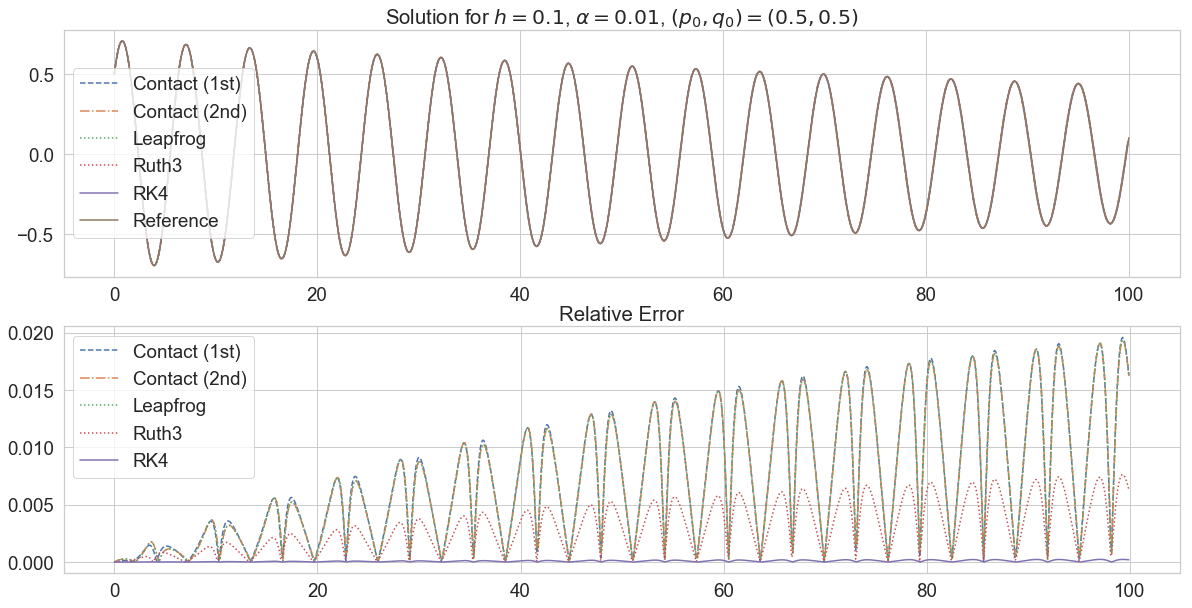

In [4]:
init = (.5, .5)
tspan = (0.0, 100.0)
a = 0.01
h = 0.1
delta = 10

cmp_plot(init, tspan, a, h, delta)

/Users/marcelloseri/Library/Python/3.7/lib/python/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


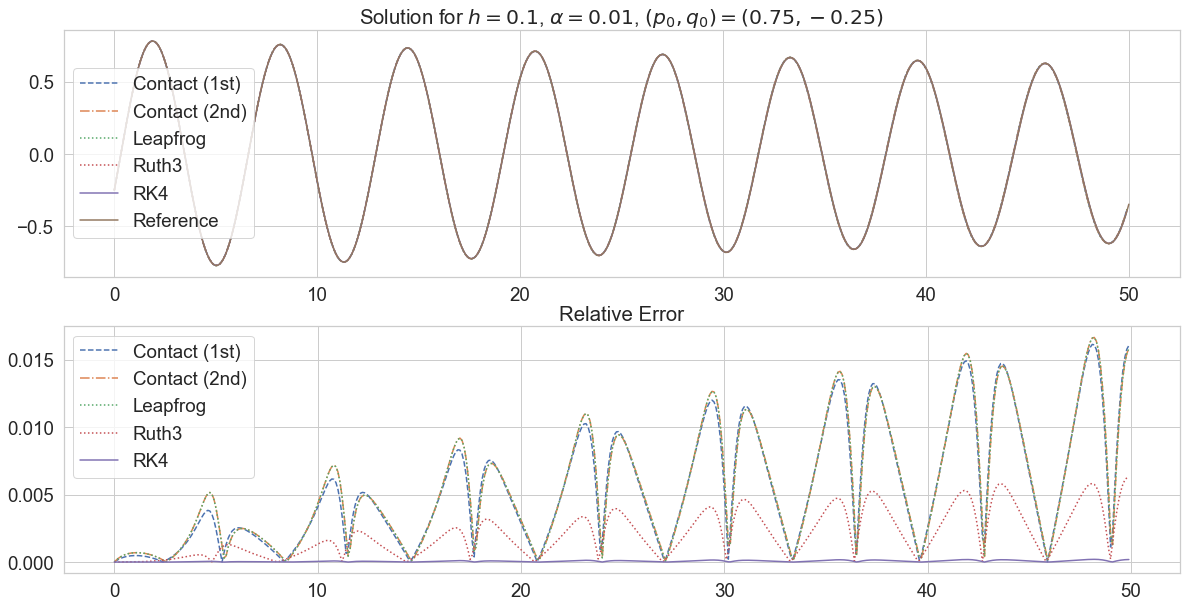

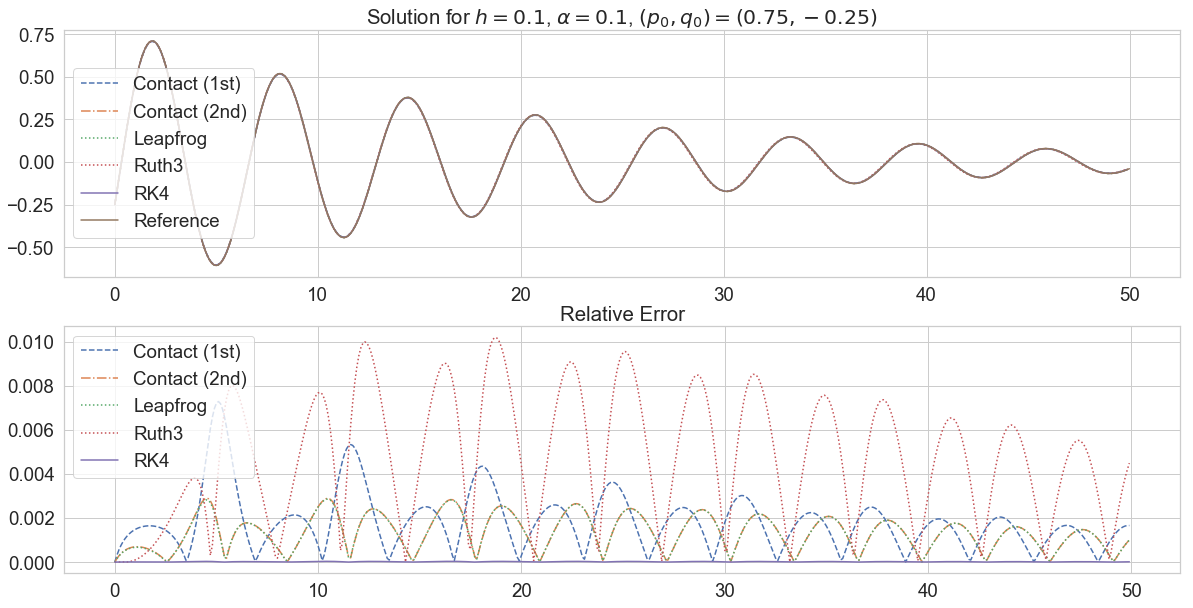

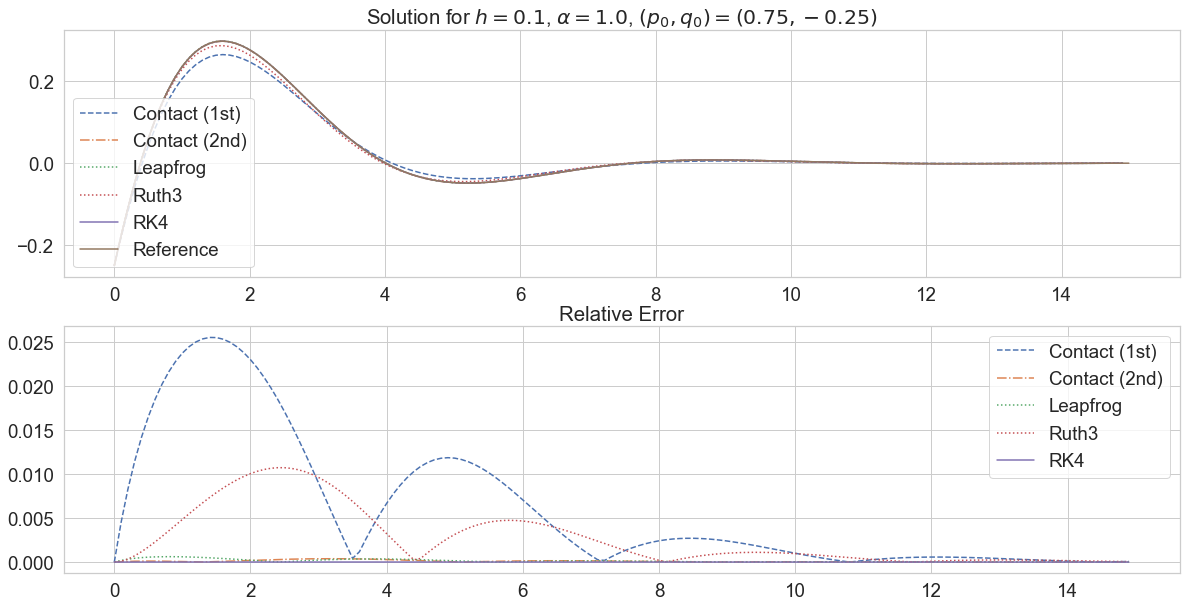

In [ ]:
#init = np.random.rand(2)
init = (.75,-.25)
delta = 10
tspan = (0.0, 50.0)

for a in [.01, 0.1, 1.0, 2.0]:
    if a > .5:
        tspan = (0.0, 15.0)
    for h in [0.1]:
        cmp_plot(init, tspan, a, h, delta) #, save=True)